# Loan Payments Dataset
#### link: https://www.kaggle.com/zhijinzhai/loandata

Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

The dataset provided includes 11 categories:\
1) Loan ID: ID of the individual\
2) Loan_status: status of the loan\
3) Principal: Principal of the loan\
4) terms: Can be weekly (7 days), biweekly, and monthly payoff schedule\
5) effective_date: Date the loan was extended to the individual\
6) paid_off_time: date and time the loan was paid off
7) due_date: Date the loan is due\
8) past_due: Number of days that the loan is past due\
9) age: age of the individual\
10) education: education of the individual\
11) Gender: gender of the individual

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import warnings

In [2]:
os.chdir("D:\\google-drive\\3. Projects in Progress\\1. Data Analytics\\Kaggle - Loan Payment")
loan_df = pd.read_csv("Loanpaymentsdata.csv")

## Preliminary Analysis

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [4]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Principal,500.0,943.200,115.240274,300.0,1000.0,1000.0,1000.0,1000.0
terms,500.0,22.824,8.000064,7.0,15.0,30.0,30.0,30.0
past_due_days,200.0,36.010,29.380880,1.0,3.0,37.0,60.0,76.0
age,500.0,31.116,6.084784,18.0,27.0,30.0,35.0,51.0


In [18]:
loan_df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


## Create new features

NA values in the 'past_due_days' column indicates that the customer has paid off the loan at or before the due date. As a result, we will replace these values with 0

In [3]:
loan_df['past_due_days'].fillna(0,inplace = True)

Create a new variable called generation of the individual. The individual will be placed into one of the 4 generations (Gen Z, Millenials, Gen X and Baby Boomer). This will help us further understand if there is a correlation between 

In [4]:
loan_df['year'] = pd.DatetimeIndex(loan_df['effective_date']).year
loan_df['generation'] = ""

for i in range(0,len(loan_df['year'])):
    year_born = loan_df['year'][i] - loan_df['age'][i]
    
    # Gen Z 1966
    # Millenials - 1977 - 1995
    # Generation X 1965 - 1976
    # Baby Boomers 1946 - 1964
    
    if year_born >= 1996:
        loan_df['generation'][i] = 'Gen Z'
    elif (year_born >= 1977) & (year_born <= 1995):
        loan_df['generation'][i] = 'Millenials'
    elif (year_born >= 1965) & (year_born <= 1976):
        loan_df['generation'][i] = 'Generation X'
    elif (year_born >= 1946) & (year_born <= 1964):
        loan_df['generation'][i] = 'Baby Boomers'

D:\Spyder\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Spyder\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
D:\Spyder\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Created 2 new variables. The first variable shows the day that the loan was taken by the customer. The second variable shows the day that the loan was paid back by the customer.

In [5]:
def find_weekdayname(x):
    if x == 0:
        return 'Monday'
    elif x == 1:
        return 'Tuesday'
    elif x == 2:
        return 'Wednesday'
    elif x == 3:
        return 'Thursday'
    elif x == 4:
        return 'Friday'
    elif x == 5:
        return 'Saturday'
    elif x == 6:
        return 'Sunday'
    else:
        return 'Loan not repaid'

# Create a variable that shows the day that the loan was taken by the customer
loan_df['effective_date'] = pd.to_datetime(loan_df['effective_date'])
loan_df['effective_date_day'] = loan_df['effective_date'].dt.dayofweek

for i in range(0,len(loan_df['effective_date'])):
    loan_df['effective_date_day'][i] = find_weekdayname(loan_df['effective_date_day'][i])

# Create a variable that shows the day that the loan was repaid by the customer  
loan_df['paid_off_time_day'] = pd.to_datetime(loan_df['paid_off_time'])
loan_df['paid_off_time_day'] = loan_df['paid_off_time_day'].dt.dayofweek

for i in range(0,len(loan_df['paid_off_time_day'])):
    loan_df['paid_off_time_day'][i] = find_weekdayname(loan_df['paid_off_time_day'][i])

D:\Spyder\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Spyder\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\Spyder\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Created a new variable called paid_off_time_hour which shows the hour that the customer made the final loan payment.

In [9]:
loan_df['paid_off_time_hour'] = pd.to_datetime(loan_df['paid_off_time'])
loan_df['paid_off_time_hour'] = loan_df['paid_off_time_hour'].dt.hour

In [89]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Loan_ID             500 non-null    object        
 1   loan_status         500 non-null    object        
 2   Principal           500 non-null    int64         
 3   terms               500 non-null    int64         
 4   effective_date      500 non-null    datetime64[ns]
 5   due_date            500 non-null    object        
 6   paid_off_time       400 non-null    object        
 7   past_due_days       500 non-null    float64       
 8   age                 500 non-null    int64         
 9   education           500 non-null    object        
 10  Gender              500 non-null    object        
 11  year                500 non-null    int64         
 12  generation          500 non-null    object        
 13  effective_date_day  500 non-null    object        

In [90]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Principal,500.0,943.200,115.240274,300.0,1000.0,1000.0,1000.0,1000.0
terms,500.0,22.824,8.000064,7.0,15.0,30.0,30.0,30.0
past_due_days,500.0,14.404,25.614312,0.0,0.0,0.0,12.0,76.0
age,500.0,31.116,6.084784,18.0,27.0,30.0,35.0,51.0
year,500.0,2016.000,0.000000,2016.0,2016.0,2016.0,2016.0,2016.0
paid_off_time_hour,400.0,13.445,4.641210,0.0,9.0,13.0,16.0,23.0


## Explanatory Analysis

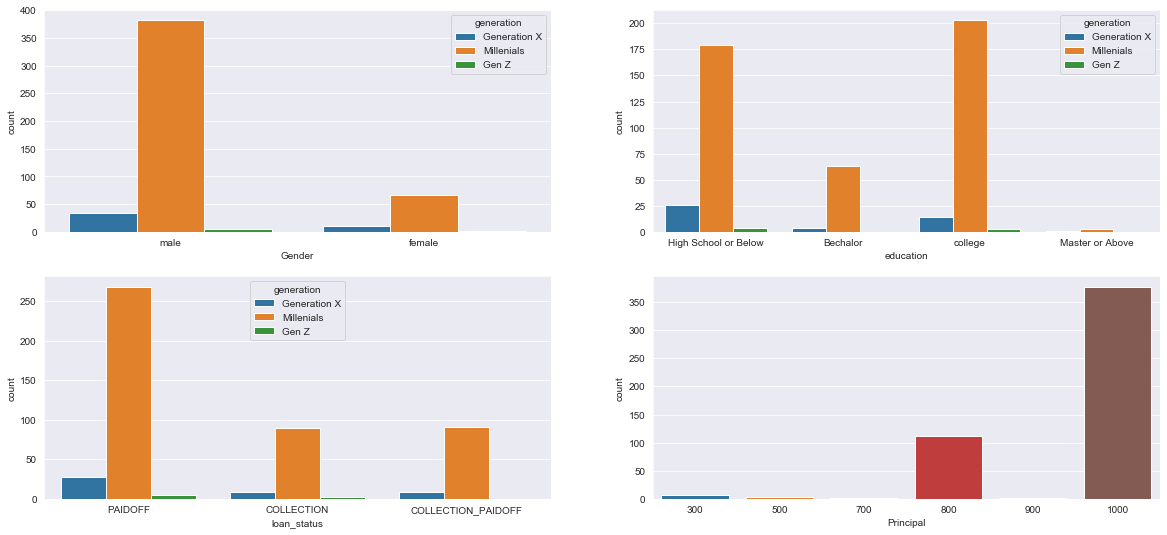

In [59]:
f, axes = plt.subplots(2,2, figsize = (20,9), sharex = False, sharey = False)
k1 = sns.countplot(x = 'Principal', data = loan_df, ax = axes[1,1])
k2 = sns.countplot(x = loan_df["loan_status"], hue = loan_df['generation'], ax = axes[1,0])
k3 = sns.countplot(x = loan_df["education"],hue = loan_df['generation'], ax = axes[0,1])
k4 = sns.countplot(x = loan_df["Gender"], hue = loan_df['generation'], ax = axes[0,0])

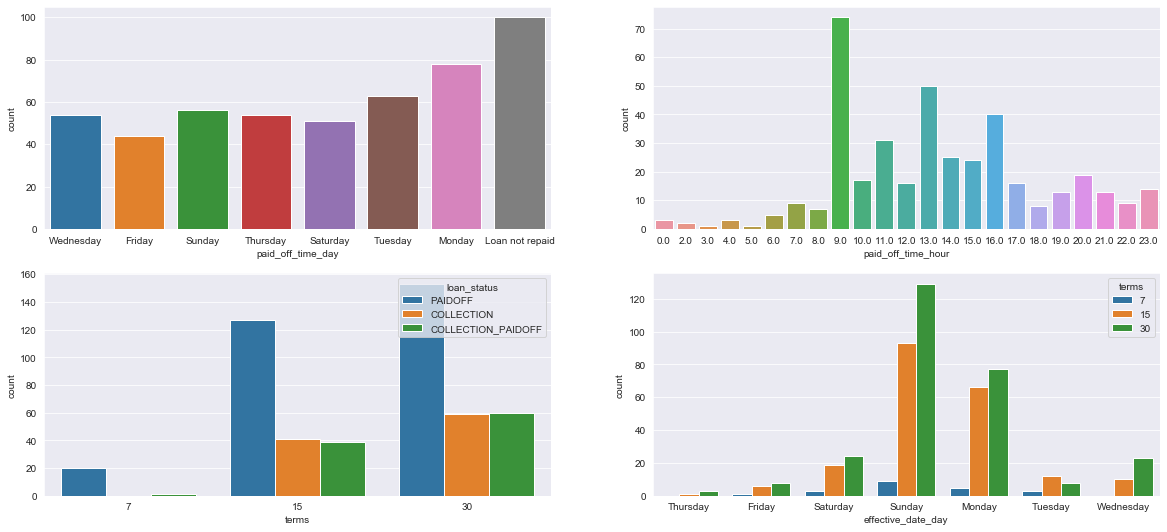

In [58]:
f, axes = plt.subplots(2,2, figsize = (20,9), sharex = False, sharey = False)
k1 = sns.countplot(x = loan_df['terms'], hue = loan_df['loan_status'], ax = axes[1,0])
k2 = sns.countplot(x = loan_df['effective_date_day'], hue = loan_df['terms'], ax = axes[1,1])
k3 = sns.countplot(x = loan_df['paid_off_time_hour'], ax = axes[0,1])
k4 = sns.countplot(x = loan_df['paid_off_time_day'], ax = axes[0,0])

### Loan not paid-off explanatory statistics

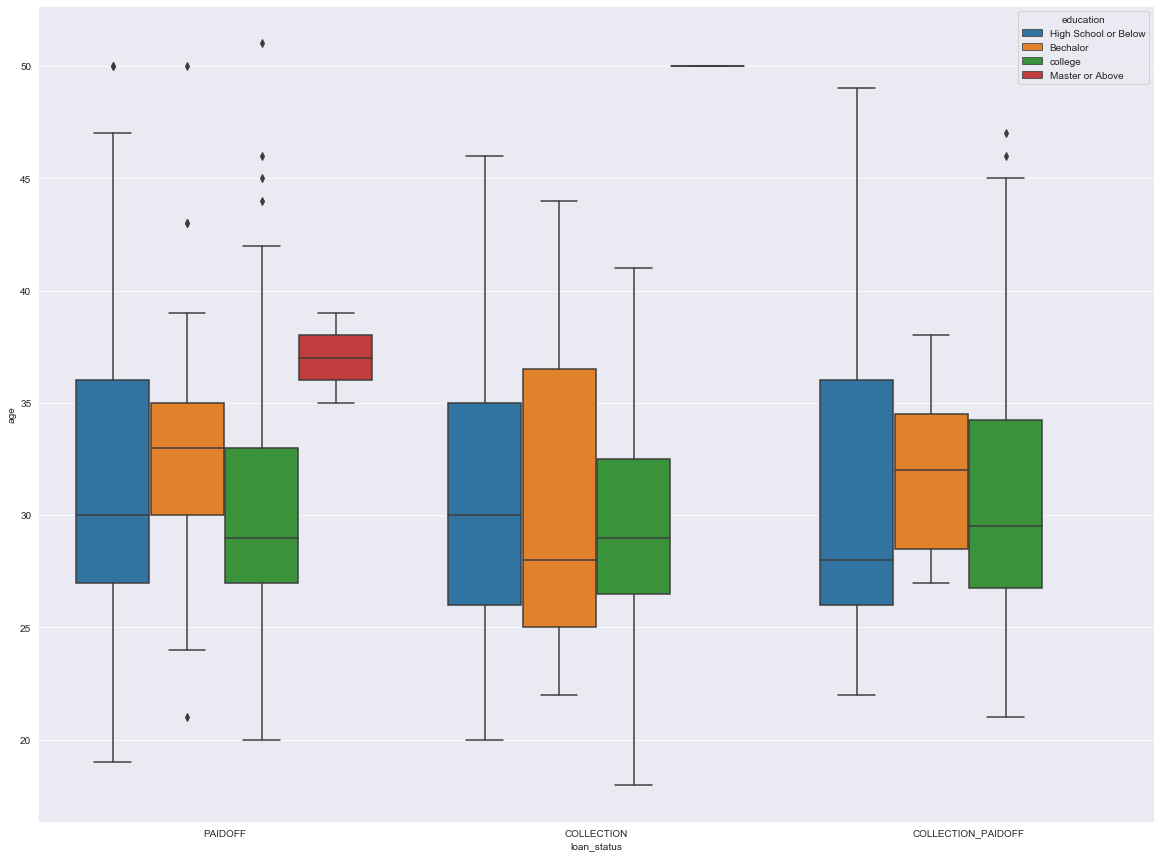

In [63]:
# loan_status vs generation
# loan_status vs Gender
# loan_status vs Term
plt.figure(figsize=(20,15))
sns.boxplot(data = loan_df, x = 'loan_status', y = 'age', hue = 'education')

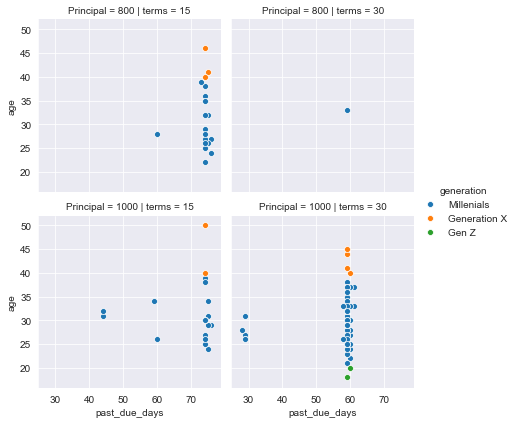

In [87]:
g = sns.FacetGrid(loan_df[loan_df['paid_off_time_day'] == 'Loan not repaid'], row = 'Principal', col = 'terms', 
                  hue = 'generation')
kws = dict(s = 60, linewidth = 0.5, edgecolor = 'black')
g = g.map(sns.scatterplot, 'past_due_days', 'age')
g.add_legend()

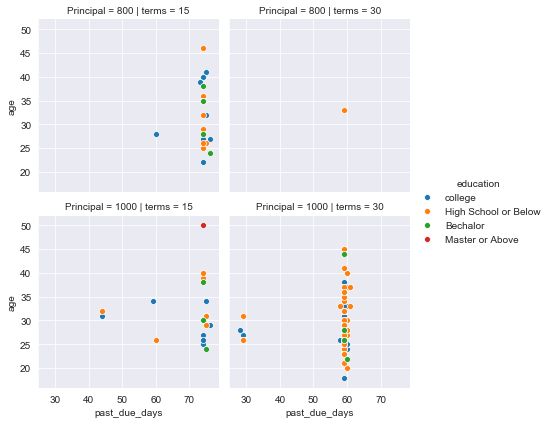

In [88]:
g = sns.FacetGrid(loan_df[loan_df['paid_off_time_day'] == 'Loan not repaid'], row = 'Principal', col = 'terms', 
                  hue = 'education')
kws = dict(s = 60, linewidth = 0.5, edgecolor = 'black')
g = g.map(sns.scatterplot, 'past_due_days', 'age')
g.add_legend()